In [1]:
import cv2
import numpy as np
from superpoint.datasets.synthetic_shapes import SyntheticShapes
from utils import plot_imgs

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
config = {
    'on-the-fly': True,
    'generation': {
        'params': {
            'generate_background': {'min_kernel_size': 150, 'max_kernel_size': 500, 
                                    'min_rad_ratio': 0.02, 'max_rad_ratio': 0.031},
        }
    },
    'preprocessing': {
        'resize': [120, 160],
        'blur_size': 21,
    },
    'augmentation' : {
        'enable': True,
        'primitives': [
            'random_brightness', 'additive_gaussian_noise', 'additive_speckle_noise', 'add_shade', 'motion_blur'],
        'params': {
            'additive_gaussian_noise': {'std': [3, 12]},
            'motion_blur': {'max_ksize': 7},
            'additive_speckle_noise': {'intensity': 1},
            'add_shade': {'amplitude': [-.5, .8], 'kernel_size_interval': [50, 100]},
            'random_brightness': {'max_change': 75},
        }
    }
}
dataset = SyntheticShapes(**config)
data = dataset.get_training_set()

In [3]:
def draw_keypoints(img, corners, color):
    keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in np.stack(corners).T]
    return cv2.drawKeypoints(img.astype(np.uint8), keypoints, None, color=color)
def display(d):
    return draw_keypoints(d['image'][..., 0], np.where(d['keypoint_map']), (0, 255, 0))

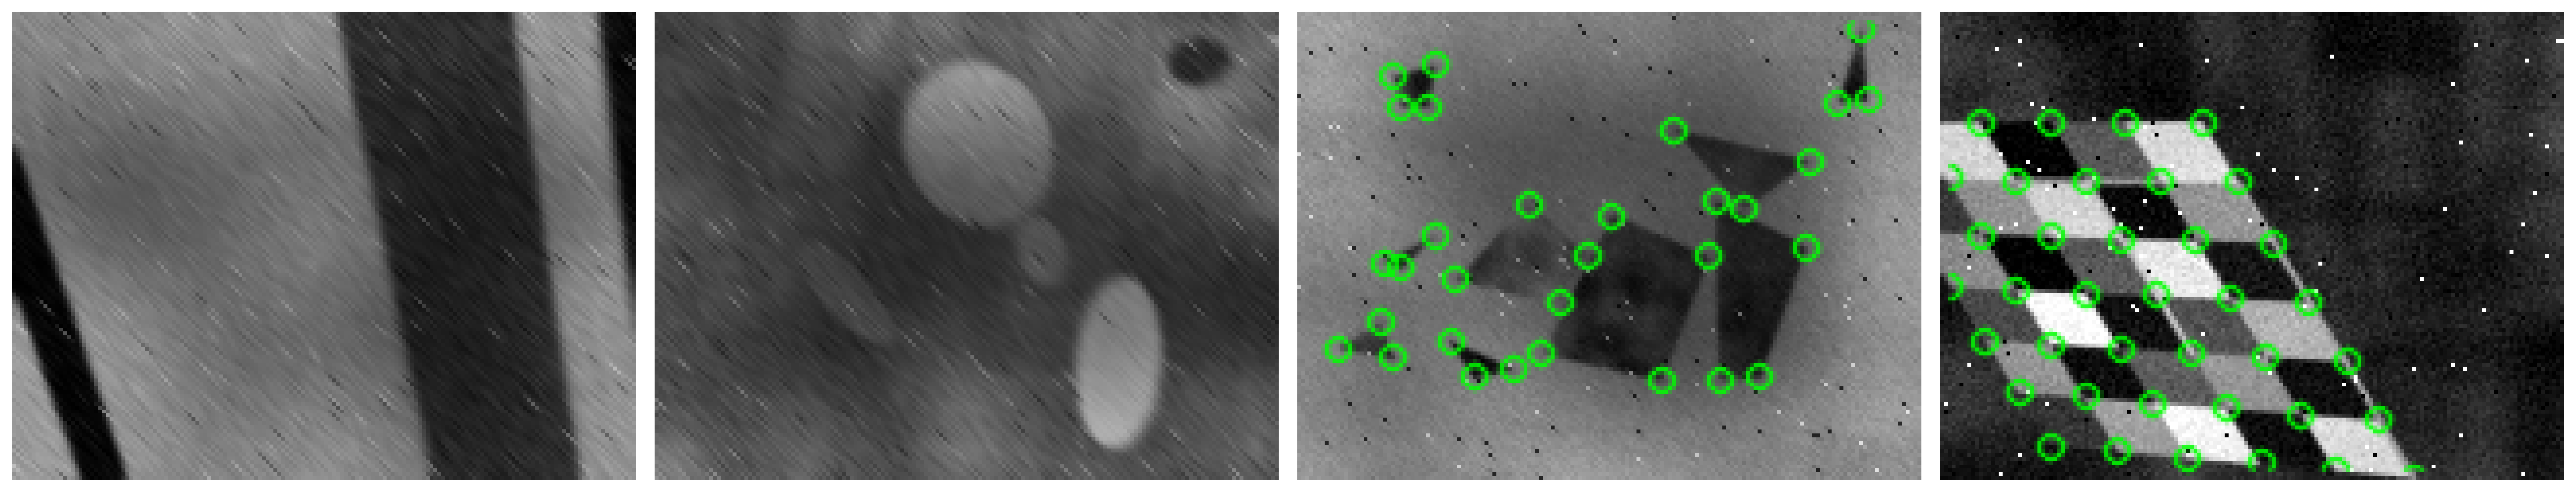

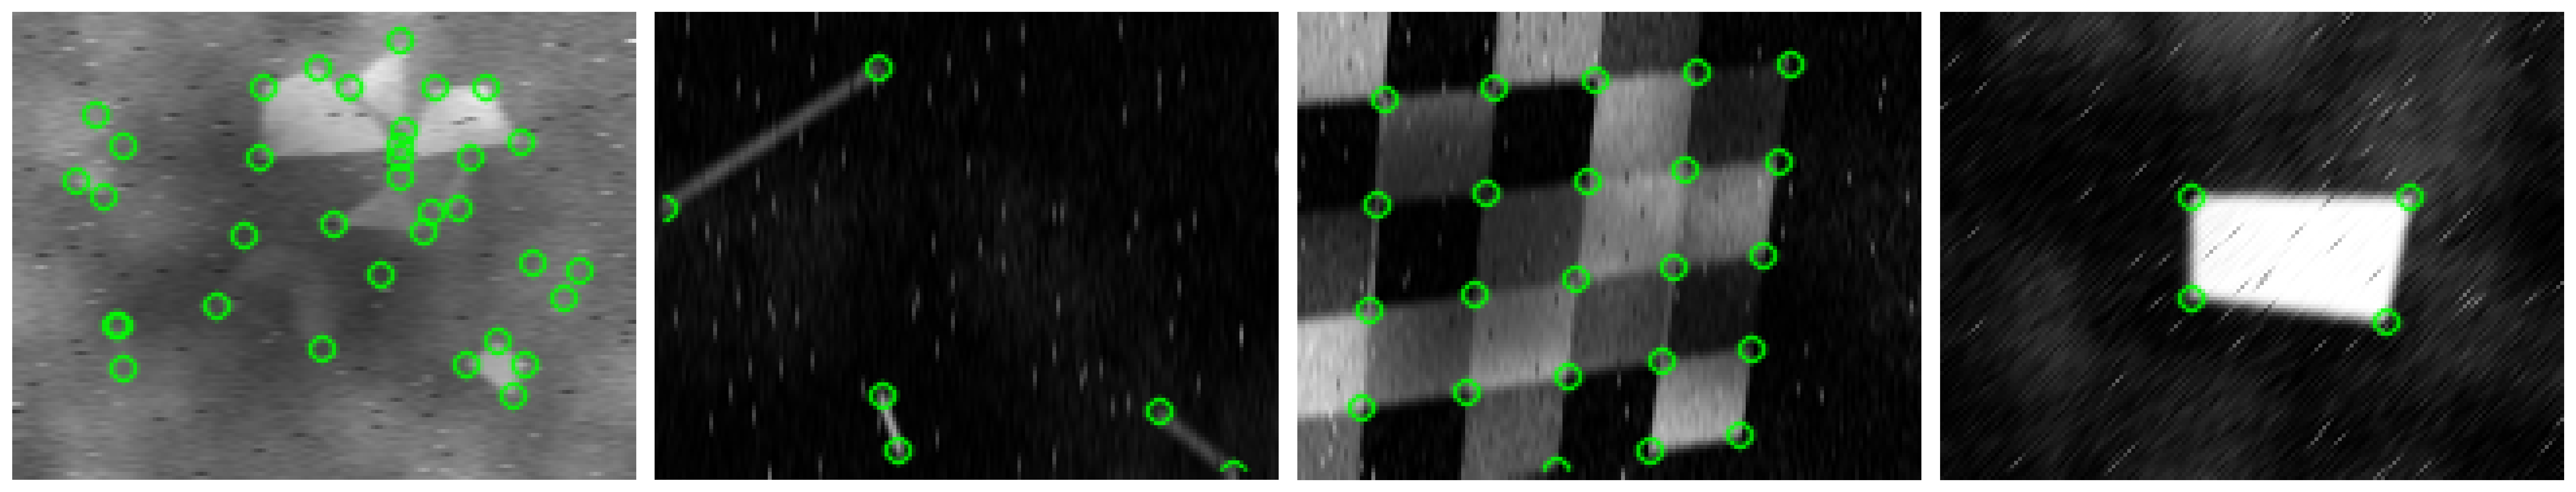

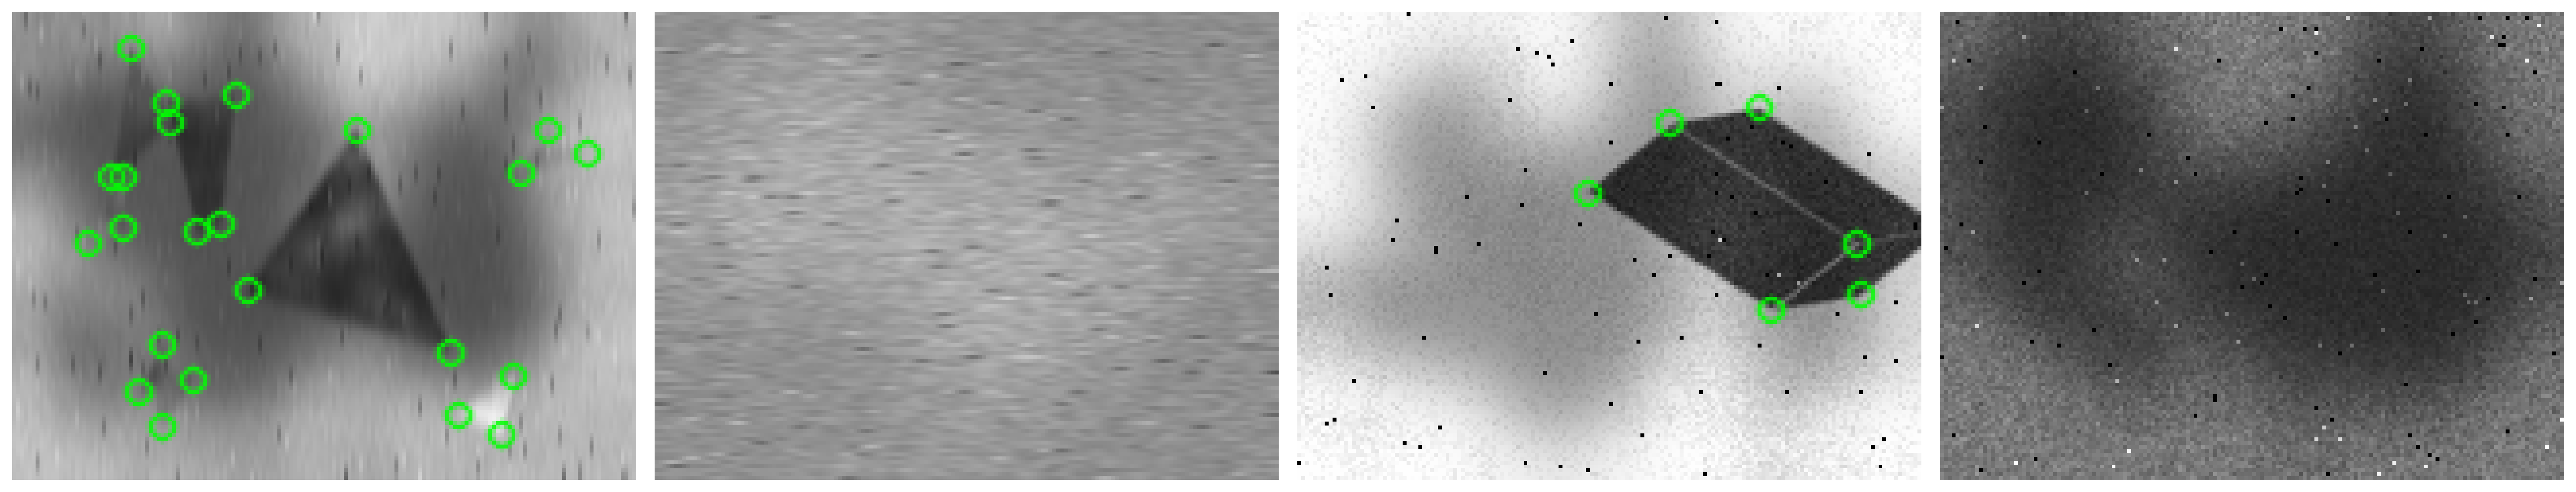

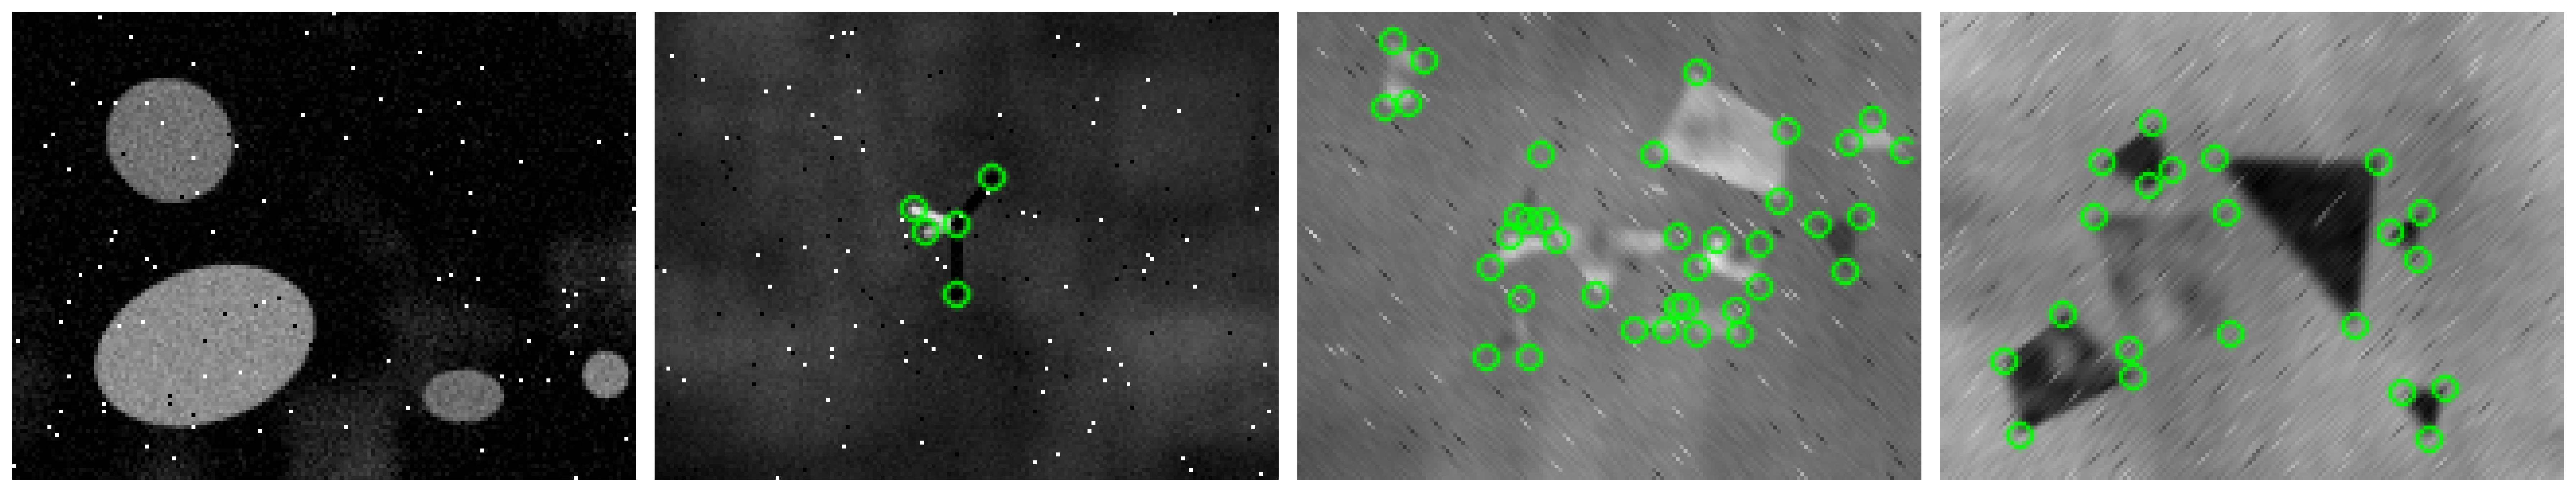

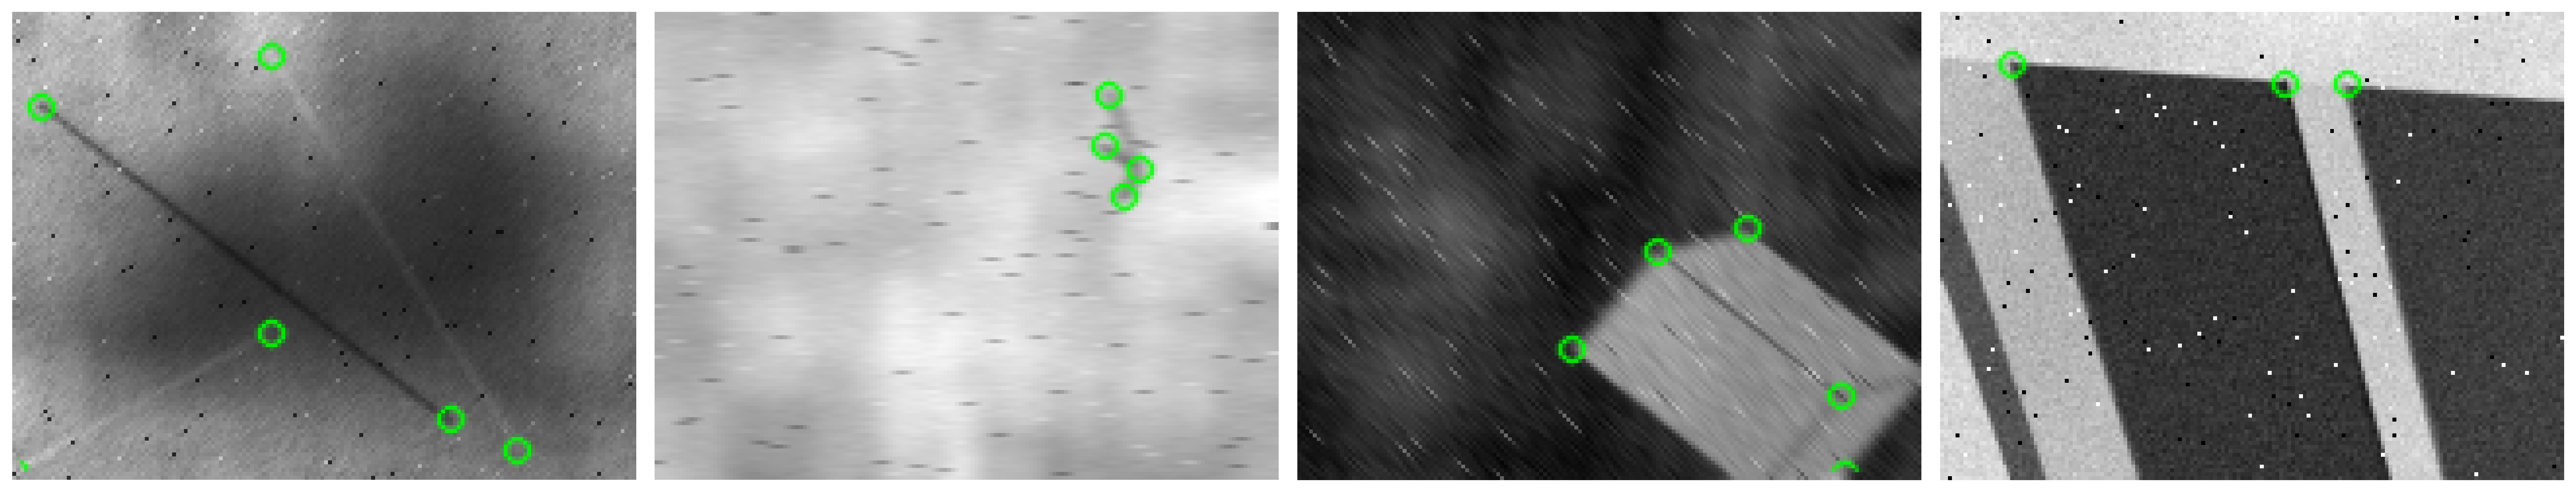

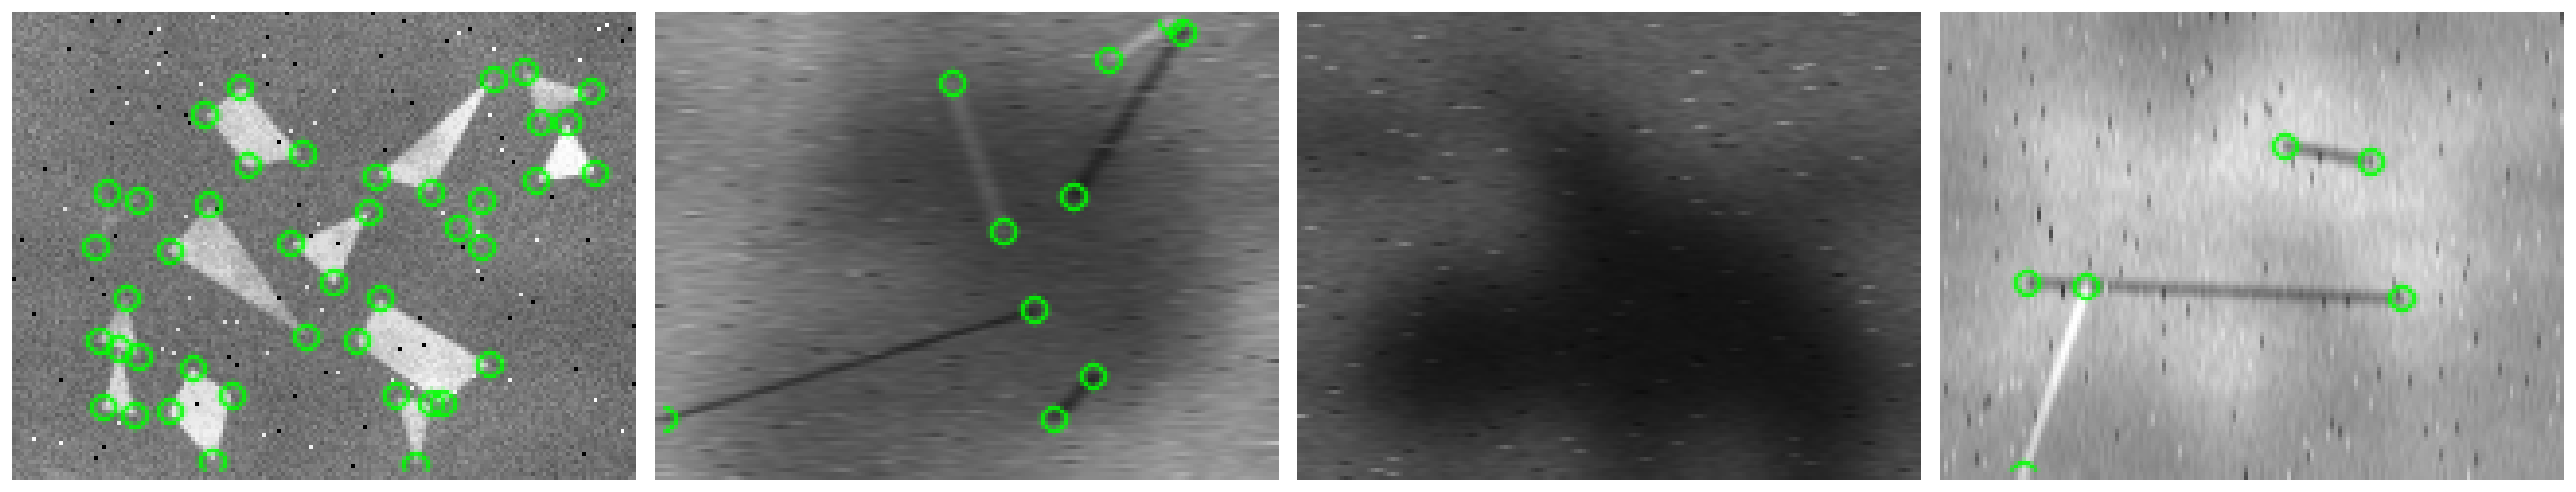

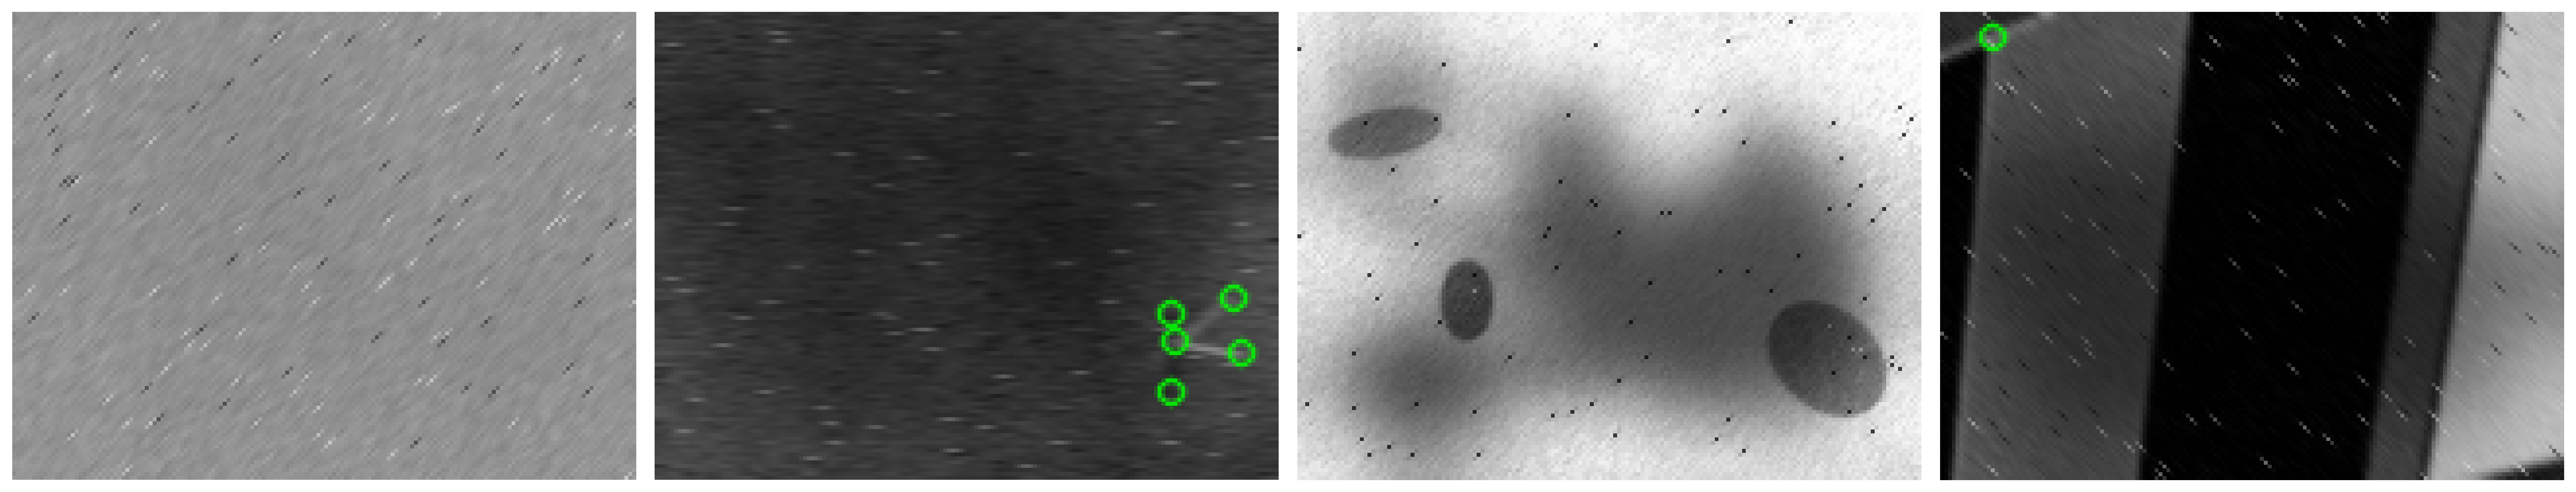

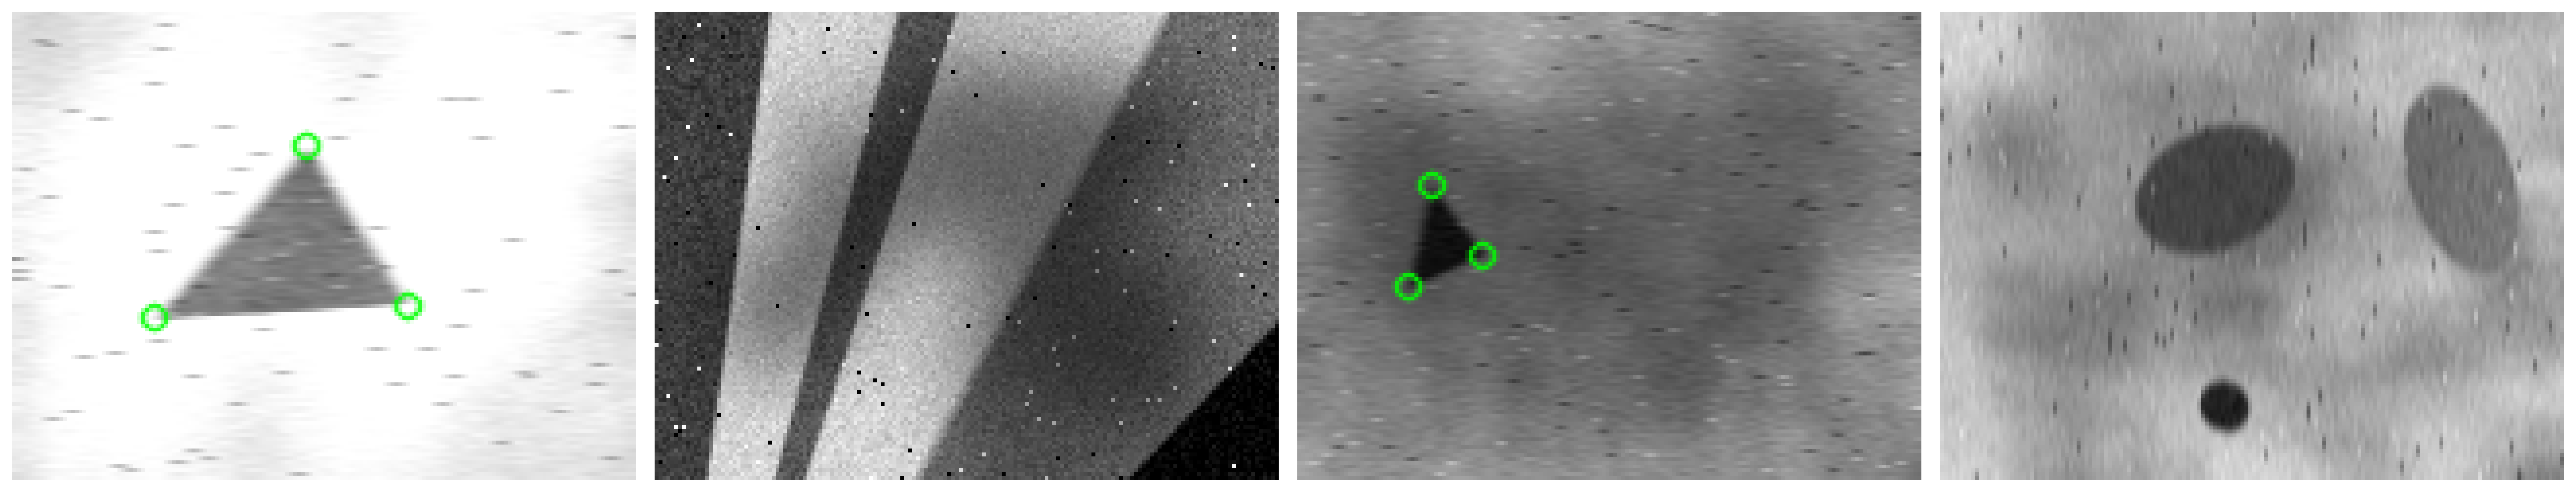

In [4]:
for i in range(8):
    plot_imgs([display(next(data))/255. for _ in range(4)], dpi=300)